<a href="https://colab.research.google.com/github/MaluArr/IDHM-dos-Municipios-Brasileiros/blob/main/MALU_ATIVIDADE_EXTRA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Atividade de Ponto Extra
**Cenário:**

Um gestor público solicita uma consultoria um levantamento de diversas informações sobre os municípios brasileiros. O objetivo é estudar características e propor políticas adequadas nas áreas de Educação, Saúde e aumento de Renda. Para auxiliar nesse estudo, utilize uma base de dados ` cidades_do_brasil.xlsx ` e responda às seguintes perguntas:

**Panorama Geral:**

O primeiro indicador a ser analisado é o Índice de Desenvolvimento Humano Municipal ( IDHM ), que é composto por três dimensões: longevidade, educação e renda. O índice varia de 0 a 1, sendo que quanto mais próximo de 1, maior o desenvolvimento humano.

In [94]:
!git config --global user.name "MaluArr"
!git config --global user.email "mluisaarruda@hotmail.com"

In [95]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [96]:
from google.colab import drive
drive.mount('/content/drive')
from google.colab import files
uploaded = files.upload()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Saving MARIA LUÍSA VIEIRA ARRUDA - cidades_do_brasil.xlsx to MARIA LUÍSA VIEIRA ARRUDA - cidades_do_brasil.xlsx


In [97]:
BrazilianCities = pd.read_excel(r'MARIA LUÍSA VIEIRA ARRUDA - cidades_do_brasil.xlsx',  skiprows=3)
BrazilianCities .head(10)

,Município,Estado,IBGE_1-4,IDHM,IDHM_Renda,IDHM_Educacao,GDP_CAPITA,COMP_P,Valor Vazio
0,Mojuí Dos Campos,PA,NaN,NaN,NaN,NaN,8831.56,41.0,1
1,Paraíso Das Águas,MS,NaN,NaN,NaN,NaN,92163.92,3.0,1
2,Balneário Rincão,SC,NaN,NaN,NaN,NaN,17788.63,3.0,1
3,Pescaria Brava,SC,NaN,NaN,NaN,NaN,8341.33,14.0,1
4,Santa Terezinha,BA,126.0,NaN,NaN,NaN,6796.16,12.0,1
5,Pinto Bandeira,RS,NaN,NaN,NaN,NaN,18184.45,1.0,1
6,Lagoa Dos Patos,RS,NaN,NaN,NaN,NaN,NaN,NaN,1
7,Santa Teresinha,BA,NaN,0.590,0.549,0.459,NaN,NaN,1
8,São Caetano,PE,NaN,NaN,NaN,NaN,NaN,NaN,1
9,São Paulo,SP,514794.0,0.805,0.843,0.725,57071.43,16030.0,0


##Descrevendo as Variáveis

In [98]:
BrazilianCities.describe(include='all')

,Município,Estado,IBGE_1-4,IDHM,IDHM_Renda,IDHM_Educacao,GDP_CAPITA,COMP_P,Valor Vazio
count,5576,5576,5568.000000,5568.000000,5568.000000,5568.000000,5573.000000,5573.000000,5576.000000
unique,5299,27,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,São Domingos,MG,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,5,853,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,1544.858657,0.659223,0.642918,0.559136,21129.767244,30.973802,0.001614
std,NaN,NaN,9250.689121,0.071970,0.080668,0.093351,20327.836119,260.937133,0.040147
min,NaN,NaN,5.000000,0.418000,0.400000,0.207000,3190.570000,0.000000,0.000000
25%,NaN,NaN,158.000000,0.599000,0.572000,0.490000,9061.720000,2.000000,0.000000
50%,NaN,NaN,376.500000,0.665000,0.654000,0.560000,15879.960000,6.000000,0.000000
75%,NaN,NaN,952.000000,0.718000,0.707000,0.631000,26156.990000,17.000000,0.000000


## IDHM

### A - Quartil Inferior:
Qual o valor que separa os 25% dos municípios com os menores IDHM? Utilize o conceito de quartis.

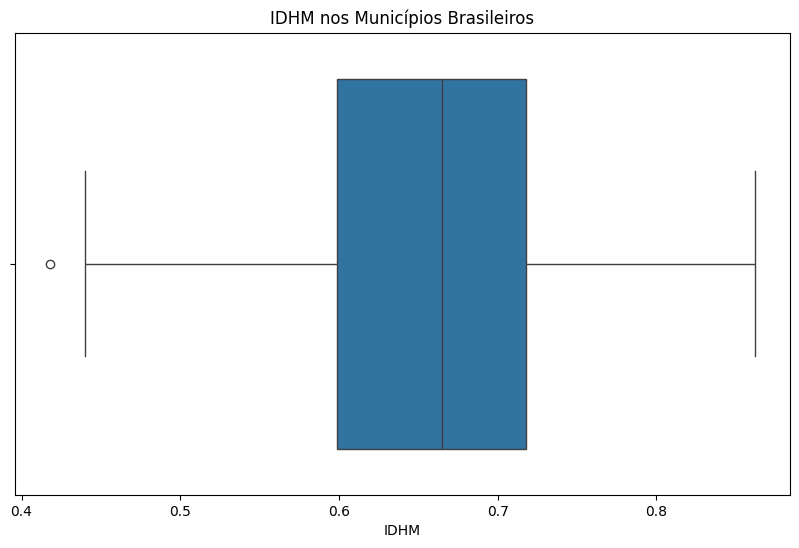

Estatísticas descritivas do IDHM:
count    5568.000000
mean        0.659223
std         0.071970
min         0.418000
25%         0.599000
50%         0.665000
75%         0.718000
max         0.862000
Name: IDHM, dtype: float64
O valor que separa os 25% dos municípios com os menores IDHM é: 0.60

Número de municípios com IDHM abaixo ou igual ao quartil inferior: 1399


In [99]:
# Box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x=BrazilianCities['IDHM'])
plt.title('IDHM nos Municípios Brasileiros')
plt.xlabel('IDHM')
plt.show()

# Quartil inferior - 25%- do IDHM
quartil_inferior = BrazilianCities['IDHM'].quantile(0.25)

# descritivas
estatisticas = BrazilianCities['IDHM'].describe()

print(f"Estatísticas descritivas do IDHM:")
print(estatisticas)
print(f"O valor que separa os 25% dos municípios com os menores IDHM é: {quartil_inferior:.2f}")

# Contando quantos municípios estão abaixo do quartil inferior
municipios_abaixo_quartil = (BrazilianCities['IDHM'] <= quartil_inferior).sum()
print(f"\nNúmero de municípios com IDHM abaixo ou igual ao quartil inferior: {municipios_abaixo_quartil}")

### B - Concentração Geográfica:
Considerando os municípios com menor IDHM, existe uma concentração em algum estado ou distrito? Utilize o conceito de  Pareto  para fundamentar sua resposta.

**O princípio de Pareto**, também conhecido como regra 80/20, sugere que aproximadamente 80% dos efeitos vêm de 20% das causas. Neste caso, será verificado se 80% dos municípios com menor IDHM estão concentrados em 20% dos estados.

Utilização da **porcentagem acumulada**:
A porcentagem acumulada é uma medida que mostra o total acumulado de uma variável em relação ao total geral, expressa como uma porcentagem.

Em um gráfico de Pareto, a linha de porcentagem acumulada ajuda a visualizar a contribuição de cada categoria em relação ao total, começando no zero pois não existe nenhuma porcentagem acumulada e terminando nos 100% sendo o acumúlo de todas as categorias/porcentagens.

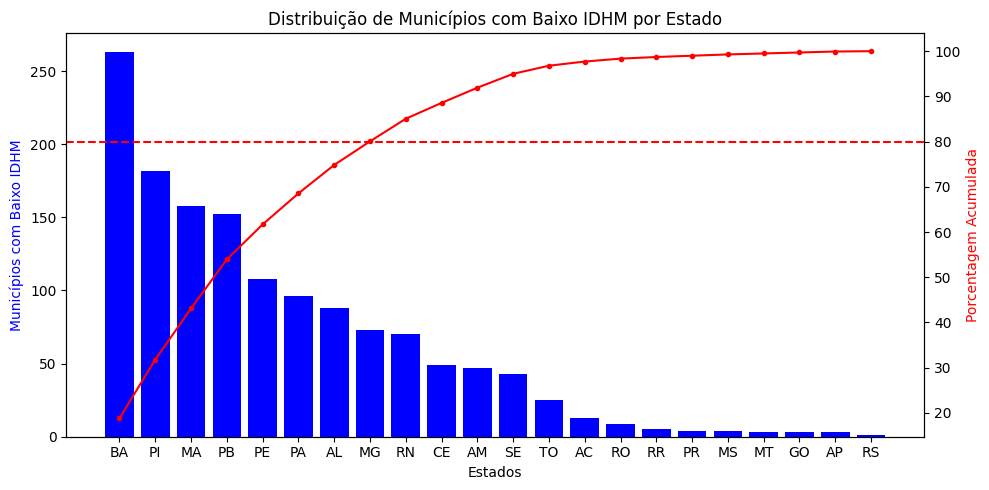

Top 5 estados com mais municípios de baixo IDHM:
        Contagem  Porcentagem Acumulada
Estado                                 
BA           263              18.799142
PI           182              31.808435
MA           158              43.102216
PB           152              53.967119
PE           108              61.686919


In [100]:
municipios_baixo_IDHM = BrazilianCities[BrazilianCities['IDHM'] <= quartil_inferior]

# Porcentagem acumulada por estado
contagem_por_estado = municipios_baixo_IDHM['Estado'].value_counts()
porcentagem_acumulada = contagem_por_estado.cumsum() / contagem_por_estado.sum() * 100

# Criando DataFrame para Pareto em ordem decrescente
df_pareto = pd.DataFrame({
    'Contagem': contagem_por_estado,
    'Porcentagem Acumulada': porcentagem_acumulada
}).sort_values('Contagem', ascending=False)

# Plotando gráfico de Pareto
fig, ax1 = plt.subplots(figsize=(10, 5))
ax1.bar(df_pareto.index, df_pareto['Contagem'], color='blue')
ax1.set_xlabel('Estados')
ax1.set_ylabel('Municípios com Baixo IDHM', color='blue')

ax2 = ax1.twinx()
ax2.plot(df_pareto.index, df_pareto['Porcentagem Acumulada'], color='red', marker='.')
ax2.set_ylabel('Porcentagem Acumulada', color='red')
ax2.axhline(y=80, color='red', linestyle='--')

plt.title('Distribuição de Municípios com Baixo IDHM por Estado')
plt.tight_layout()
plt.show()

# Resultados
estados_80_percento = (df_pareto['Porcentagem Acumulada'] <= 80).sum()
print(f"Top 5 estados com mais municípios de baixo IDHM:")
print(df_pareto.head(5))

**Conclusão:**
Para que o princípio de Pareto esteja correto nesta análise era necessário que a porcentagem acumulada dos seis primeiros estados com os menores índices de IDHM desse acima de 80%, entretanto a porcentagem acumulada informou 61.6%. Assim, é verdade declarar que 80% dos municípios com menor IDHM não estão concentrados em 20% dos estados.

### C -Classificação ONU:
A ONU classifica o IDH em quatro faixas:
- Baixo: < 0,550
- Médio: 0,550 - 0,699
- Alto: 0,700 - 0,799
- Muito Alto: >= 0,800

Pergunta:  Com base nessa classificação, analise a situação atual do Brasil e de cada região.

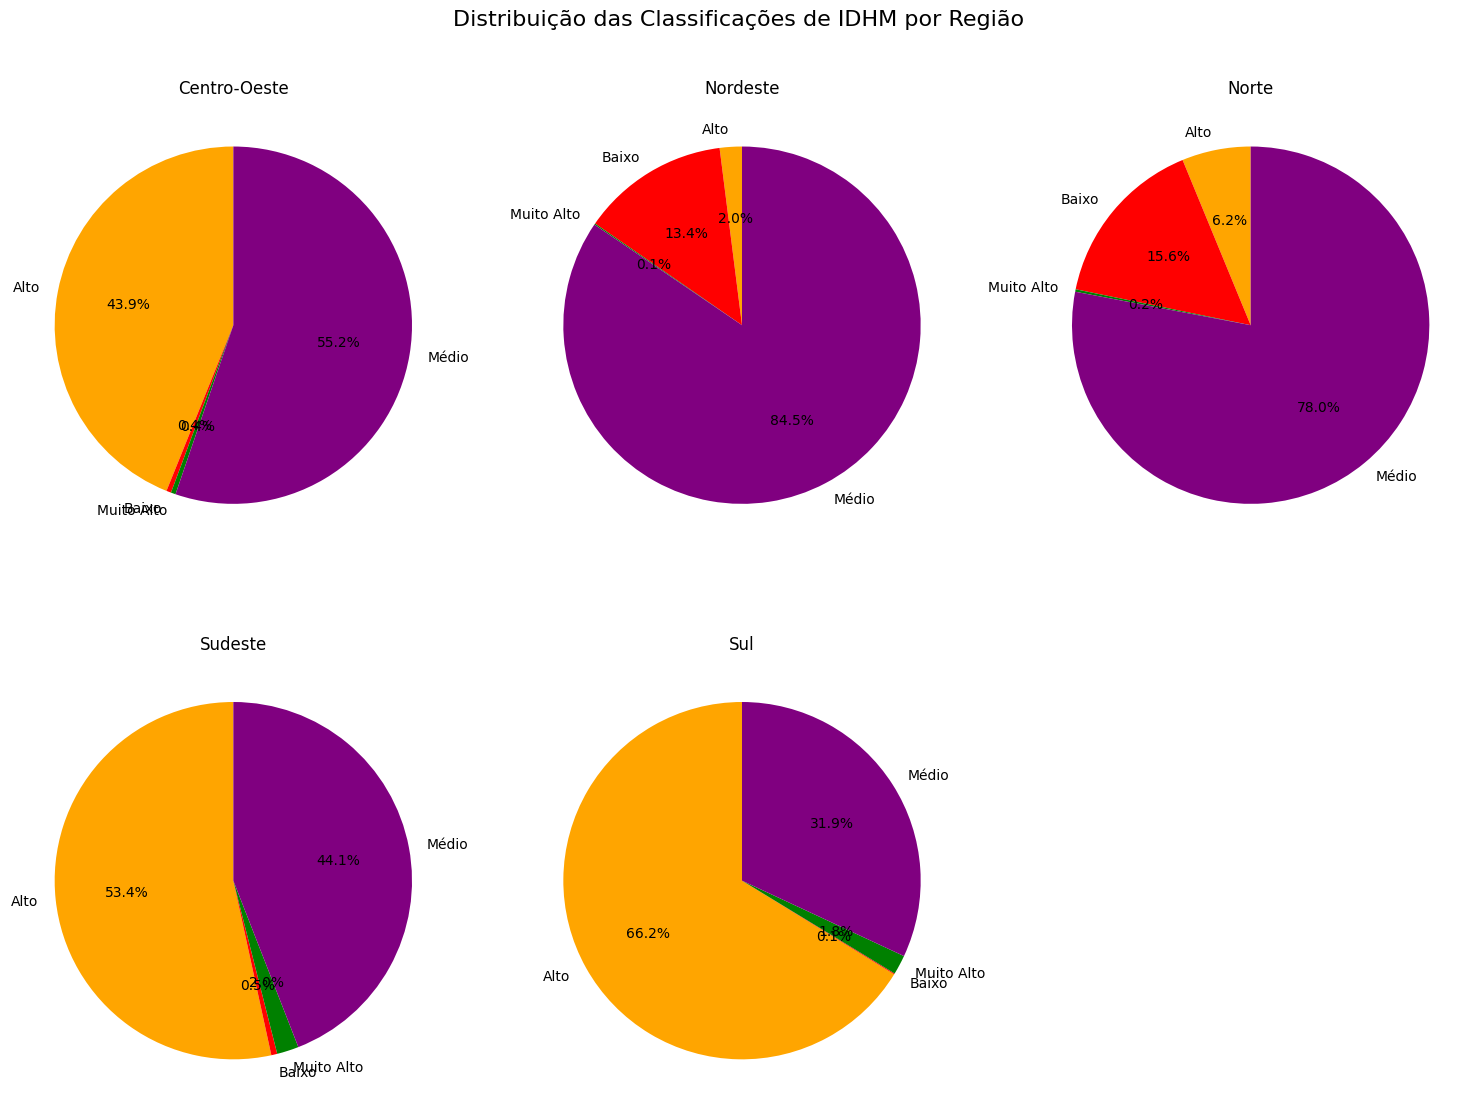

In [101]:
estado_por_regiao = {
    'AC': 'Norte', 'AP': 'Norte', 'AM': 'Norte', 'PA': 'Norte', 'RO': 'Norte', 'RR': 'Norte', 'TO': 'Norte',
    'AL': 'Nordeste', 'BA': 'Nordeste', 'CE': 'Nordeste', 'MA': 'Nordeste', 'PB': 'Nordeste', 'PE': 'Nordeste', 'PI': 'Nordeste', 'RN': 'Nordeste', 'SE': 'Nordeste',
    'DF': 'Centro-Oeste', 'GO': 'Centro-Oeste', 'MT': 'Centro-Oeste', 'MS': 'Centro-Oeste',
    'ES': 'Sudeste', 'MG': 'Sudeste', 'RJ': 'Sudeste', 'SP': 'Sudeste',
    'PR': 'Sul', 'RS': 'Sul', 'SC': 'Sul'
}

BrazilianCities['Regiao'] = BrazilianCities['Estado'].map(estado_por_regiao)

# Função para classificar o IDHM
def classificar_idhm(idhm):
    if idhm < 0.550:
        return 'Baixo'
    elif idhm < 0.700:
        return 'Médio'
    elif idhm < 0.800:
        return 'Alto'
    else:
        return 'Muito Alto'

BrazilianCities['Classificacao_IDHM'] = BrazilianCities['IDHM'].apply(classificar_idhm)

resultado_por_regiao = BrazilianCities.groupby(['Regiao', 'Classificacao_IDHM']).size().unstack(fill_value=0)

fig, axes = plt.subplots(2, 3, figsize=(15, 12))
axes = axes.flatten()

colors = {
    'Muito Alto': 'green',
    'Alto': 'orange',
    'Médio': 'purple',
    'Baixo': 'red'
}

for i, regiao in enumerate(resultado_por_regiao.index):
    distribuicao = resultado_por_regiao.loc[regiao]
    axes[i].pie(distribuicao, labels=distribuicao.index, autopct='%1.1f%%', startangle=90, colors=[colors[label] for label in distribuicao.index])
    axes[i].set_title(f'{regiao}')

# Remove o último subplot se não houver dados suficientes
if len(resultado_por_regiao.index) < len(axes):
    fig.delaxes(axes[-1])

plt.suptitle('Distribuição das Classificações de IDHM por Região', fontsize=16)
plt.tight_layout()
plt.show()

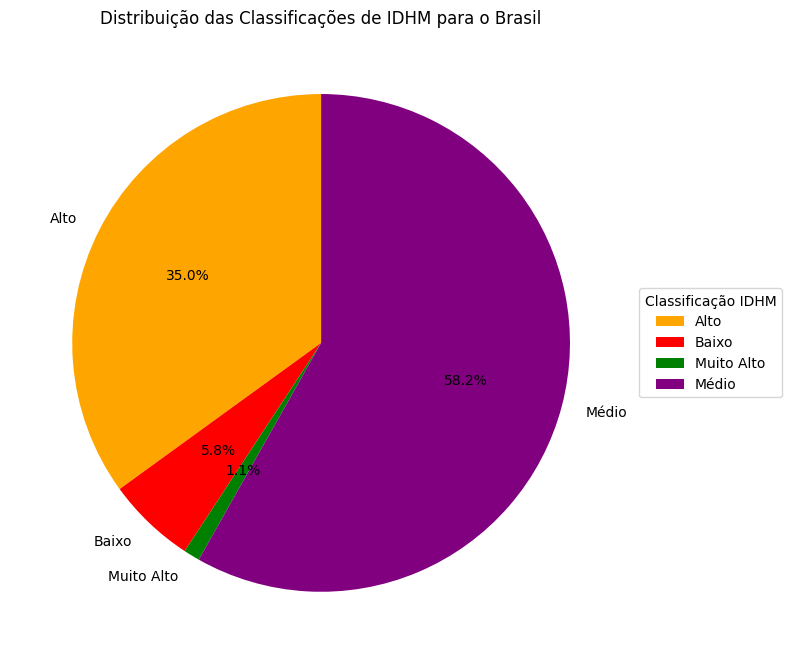

Distribuição das Classificações de IDHM por Região:
Classificacao_IDHM  Alto  Baixo  Muito Alto  Médio
Regiao                                            
Centro-Oeste         205      2           2    258
Nordeste              36    240           2   1518
Norte                 28     70           1    351
Sudeste              892      9          33    736
Sul                  790      1          21    381


In [102]:
# Análise para o Brasil como um todo
brasil_total = BrazilianCities['Classificacao_IDHM'].value_counts().sort_index()
plt.figure(figsize=(8, 8))

# Usar as cores corretas para cada classificação
color_list = [colors[idx] for idx in brasil_total.index]

brasil_total.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=color_list)
plt.title('Distribuição das Classificações de IDHM para o Brasil')
plt.ylabel('')
plt.legend(title='Classificação IDHM', loc='center left', bbox_to_anchor=(1, 0, 0.5, 1))
plt.tight_layout()
plt.show()

# Imprimir resultados
print("Distribuição das Classificações de IDHM por Região:")
print(resultado_por_regiao)

**Conclusão:**

Centro-Oeste
- A maior parte dos municípios estão incluídos no IDHM médio, indicando um nível de desenvolvimento humano moderado. Acompanhado por uma porção significativa dos municípios possui um IDHM alto, refletindo boas condições de vida.

Nordeste
- Ocorre uma predominãncia na classificação média, sugerindo desafios no desenvolvimento humano, afinal uma parcela ainda considerável dos municípios está em uma situação de desenvolvimento humano baixo.

Norte
- Muito similar ao Nordeste, uma boa parcela está na classificação média , também indicando desafios no desenvolvimento humano, pois uma parcela ainda considerável dos municípios se enquadra na classificação baixa.

Sudeste:
- A maioria dos municípios tem um IDHM alto, refletindo boas condições de vida.
Seguido por uma parcela significativa na classificação média.
- Apenas uma pequena fração atinge o nível de desenvolvimento muito alto.

Sul
- A maioria dos municípios apresenta um IDHM alto, indicando um bom nível de desenvolvimento humano. Seguido por uma porção bem menor pertecente à classifcação média.
- Alguns municípios conseguem atingir o nível de desenvolvimento muito alto.


Logo, é notório uma alta desigualdade regional, as regiões Sul e Suldeste apresentam os índices de desenvolvimento humano muito melhores em comparação com o Norte e Nordeste. Enquanto o Centro-Oeste enquadra-se em fase de transição, pois apresenta um equilíbrio entre municípios de IDHM médio e alto, refletindo realmente um desenvolvimento humano em transição.


## Educação Infantil

### D - Boxplot por Região:
- Construa um boxplot da variável  IDHM_Educacao  por região.

Comente as semelhanças e diferenças entre os gráficos.

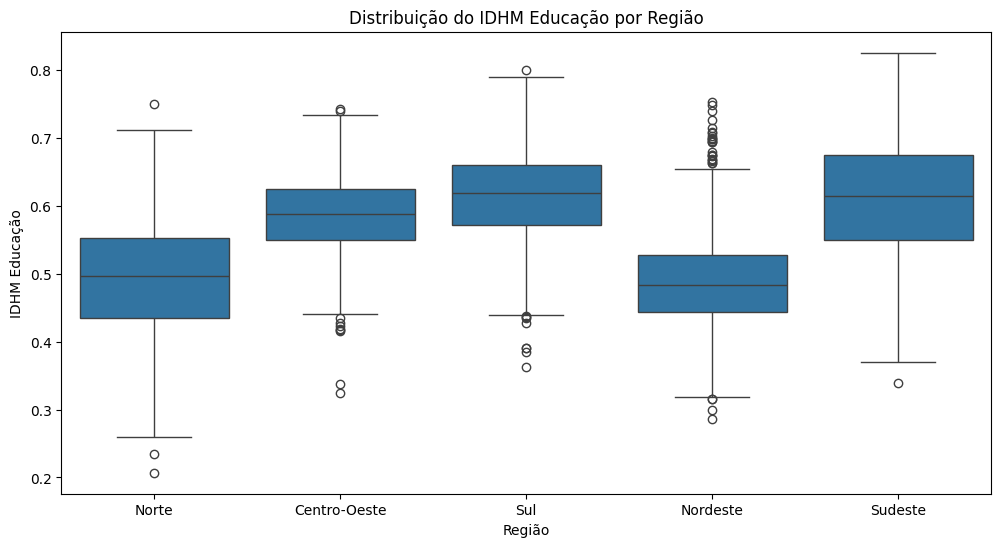

               count      mean       std    min      25%     50%    75%    max
Regiao                                                                        
Centro-Oeste   466.0  0.584142  0.060150  0.324  0.54900  0.5870  0.625  0.742
Nordeste      1794.0  0.488419  0.065785  0.286  0.44325  0.4825  0.528  0.752
Norte          449.0  0.490428  0.090665  0.207  0.43400  0.4970  0.553  0.749
Sudeste       1670.0  0.608254  0.082939  0.339  0.54900  0.6145  0.674  0.825
Sul           1189.0  0.612991  0.065181  0.362  0.57100  0.6180  0.660  0.800


In [103]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Regiao', y='IDHM_Educacao', data=BrazilianCities)
plt.title('Distribuição do IDHM Educação por Região')
plt.xlabel('Região')
plt.ylabel('IDHM Educação')
plt.show()

print(BrazilianCities.groupby('Regiao')['IDHM_Educacao'].describe())

**Conclusão:**

Sudeste e Sul
- Apresentam médias mais altas indicando melhores condições educacionais.
- Ambas as regiões têm outliers, mas eles são bastante menos numerosos e extremos que em outras regiões.

Centro-Oeste
- Apresneta uma média intermediária
- A menor dispersão sugerindo uma boa homogeneidade educacional.

Norte e Nordeste
- Representam as médias mais baixas refletindo desafios persistentes na educação.
- Ocorre uma maior dispersão, especialmente o Norte, indicando desigualdades internas mais acentuadas.
- Presença de outliers significativos

Assim como ná análise de IDHM, há uma forte desigualdade regional muito provavelmente devido a diversos fatores históricos e socieconômicos.

### E - Municípios com Mais Crianças:  
- Na região com a menor média de  IDHM_Educacao , identifica os municípios que estão acima do 3º quartil nacional em relação à quantidade de crianças com idade entre 1 e 4 anos ( variável IBGE_1-4 ).


Região com menor média de IDHM_Educacao: Nordeste
Média de IDHM_Educacao nessa região: 0.49

3º quartil nacional de IBGE_1-4: 952.00

Municípios na Nordeste acima do 3º quartil nacional:
       Município Estado  IBGE_1-4  IDHM_Educacao
16        Recife     PE   54720.0          0.698
19      Salvador     BA   91470.0          0.679
24     Fortaleza     CE  129766.0          0.695
45     Barreiras     BA    8402.0          0.668
58         Natal     RN   41558.0          0.694
...          ...    ...       ...            ...
3709   Araçoiaba     PE    1158.0          0.498
3810   Pirapemas     MA     970.0          0.514
5196   Tamandaré     PE    1134.0          0.479
5215    Irauçuba     CE    1092.0          0.557
5221  Turilândia     MA     987.0          0.402

[456 rows x 4 columns]

Total de municípios identificados: 456

Top 10 municípios na Nordeste acima do 3º quartil:
           Município Estado  IBGE_1-4  IDHM_Educacao
24         Fortaleza     CE  129766.0          0.695
19 

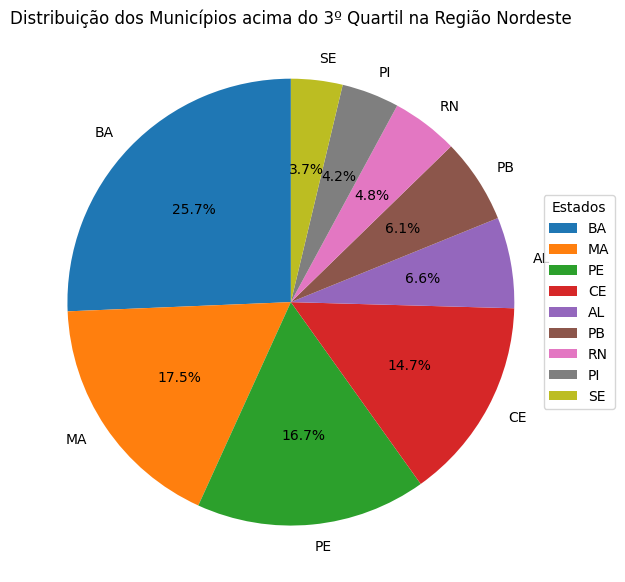

In [104]:
media_IDHMeducacao = BrazilianCities.groupby('Regiao')['IDHM_Educacao'].mean()
regiao_menor_media = media_IDHMeducacao.idxmin()

print(f"Região com menor média de IDHM_Educacao: {regiao_menor_media}")
print(f"Média de IDHM_Educacao nessa região: {media_IDHMeducacao[regiao_menor_media]:.2f}")

# Calcular o 3º quartil nacional
terceiro_quartil_nacional = BrazilianCities['IBGE_1-4'].quantile(0.75)

print(f"\n3º quartil nacional de IBGE_1-4: {terceiro_quartil_nacional:.2f}")

# Identificar municípios na região com menor IDHM_Educacao que estão acima do 3º quartil
municipios_acima_3quartil = BrazilianCities[
    (BrazilianCities['Regiao'] == regiao_menor_media) & (BrazilianCities['IBGE_1-4'] > terceiro_quartil_nacional)]

# Ordenar em ordem decrescente
municipios_acima_quartil = municipios_acima_3quartil.sort_values('IBGE_1-4', ascending=False)

print(f"\nMunicípios na {regiao_menor_media} acima do 3º quartil nacional:")
print(municipios_acima_3quartil[['Município', 'Estado', 'IBGE_1-4', 'IDHM_Educacao']])

print(f"\nTotal de municípios identificados: {len(municipios_acima_3quartil)}")

top_10_municipios = municipios_acima_3quartil.sort_values('IBGE_1-4', ascending=False).head(10)

print(f"\nTop 10 municípios na {regiao_menor_media} acima do 3º quartil:")
print(top_10_municipios[['Município', 'Estado', 'IBGE_1-4', 'IDHM_Educacao']])

# Gráfico de pizza para distribuição por estado
distribuicao_por_estado = municipios_acima_3quartil['Estado'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(distribuicao_por_estado, labels=distribuicao_por_estado.index, autopct='%1.1f%%', startangle=90)
plt.title(f'Distribuição dos Municípios acima do 3º Quartil na Região {regiao_menor_media}')
plt.axis('equal')  # Garante que o gráfico seja circular

# Adicionar uma legenda
plt.legend(title="Estados", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

plt.tight_layout()
plt.show()

### F - Empresas de Educação:

Identificar os municípios que estão no 1º quartil nacional em relação à quantidade de empresas do setor educacional (variável  COMP_P ). Dessa forma, vamos priorizar municípios com poucas empresas de educação.

1º quartil nacional de COMP_P: 2.00

Top 10 municípios com menos empresas de educação:
                     Município Estado  COMP_P  IDHM_Educacao
4281             Lagoa Do Mato     MA     0.0          0.475
4958                  Taparuba     MG     0.0          0.557
3965         São João Do Soter     MA     0.0          0.401
4960  Passagem Franca Do Piauí     PI     0.0          0.393
4961       Itapirapuã Paulista     SP     0.0          0.594
4964                Bacurituba     MA     0.0          0.479
3261                  Planalto     SP     0.0          0.639
4967                   Lizarda     TO     0.0          0.415
4551         Ibitiúra De Minas     MG     0.0          0.579
3971                Jaboticaba     RS     0.0          0.547

Total de municípios no 1º quartil: 1783
Média de COMP_P no 1º quartil: 1.04
Média de IDHM_Educacao no 1º quartil: 0.53

Distribuição dos municípios do 1º quartil por região:
Regiao
Nordeste        702
Sudeste         418
Sul             289


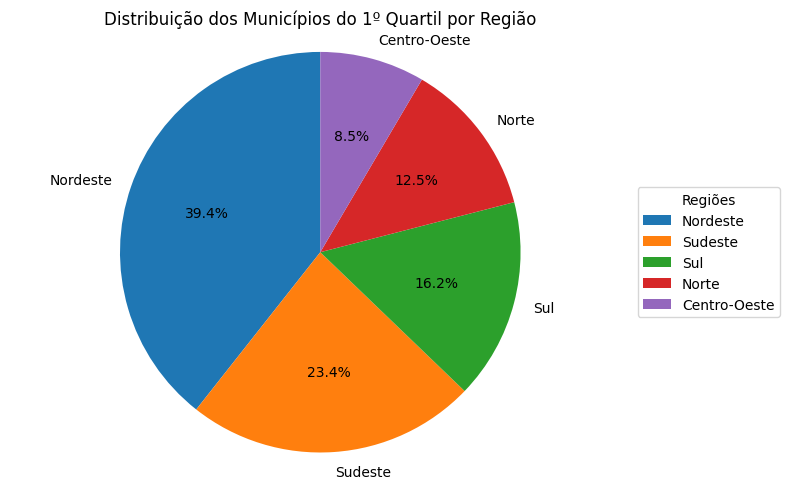

In [105]:
primeiro_quartil_nacional = BrazilianCities['COMP_P'].quantile(0.25)

print(f"1º quartil nacional de COMP_P: {primeiro_quartil_nacional:.2f}")

municipios_1quartil = BrazilianCities[BrazilianCities['COMP_P'] <= primeiro_quartil_nacional]
municipios_1quartil = municipios_1quartil.sort_values('COMP_P')

# Mostrar os 10 municípios com menos empresas de educação
print("\nTop 10 municípios com menos empresas de educação:")
print(municipios_1quartil[['Município', 'Estado', 'COMP_P', 'IDHM_Educacao']].head(10))

print(f"\nTotal de municípios no 1º quartil: {len(municipios_1quartil)}")
print(f"Média de COMP_P no 1º quartil: {municipios_1quartil['COMP_P'].mean():.2f}")
print(f"Média de IDHM_Educacao no 1º quartil: {municipios_1quartil['IDHM_Educacao'].mean():.2f}")

# Distribuição por região
distribuicao_regional = municipios_1quartil['Regiao'].value_counts()
print("\nDistribuição dos municípios do 1º quartil por região:")
print(distribuicao_regional)
print("\nPorcentagem por região:")
porcentagem_regional = (distribuicao_regional / len(municipios_1quartil) * 100).round(2)
print(porcentagem_regional)

plt.figure(figsize=(8, 5))
plt.pie(porcentagem_regional, labels=porcentagem_regional.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribuição dos Municípios do 1º Quartil por Região')
plt.axis('equal')  # Garante que o gráfico seja circular

# Adicionar uma legenda
plt.legend(title="Regiões", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

plt.tight_layout()
plt.show()

### G -Prioridade de Investimento:

Considerando as análises anteriores, proponha uma ordem de priorização para investimento na educação dessa região.

Baseando-se nas análises acima, a priorização de investimento na educação pode ser estruturada da seguinte forma:

**Nordeste:**

É a região com o maior número de municípios no 1º quartil, representando 39.37% do total. Além disso, apresenta desafios significativos em termos de desenvolvimento educacional, como evidenciado pelo IDHM da educação. Dessa forma, acredito que o investimento em infraestrutura educacional, formação de professores e programas de incentivo à criação de empresas relacionadas à educação podem alavancar uma melhorar significativa na qualidade da educação.


**Norte:**

Embora tenha uma porcentagem menor de municípios no 1º quartil , 12.51%, o IDHM de educação é preocupante em algumas áreas, necessitando de atenção para evitar que a situação se agrave. Assim, o foco deveria se concentrar em programas de alfabetização e melhorias nas escolas rurais e indígenas.

**Centro-Oeste:**

Representa a menor porcentagem de municípios no 1º quartil , 8.47%, mas por está em fase de transição ainda apresenta alguns desafios educacionais impactando o desenvolvimento regional.Por conseguinte, o desenvolvimento de parcerias com instituições de ensino, como as universidades, poderiam ocasionar uma  melhora na qualidade educacional.

**Sul e Sudeste**

Apesar de possuírem os melhores IDHM de educação é relevante destacar que a melhora é sempre possível, especialmente pois pode-se observa-se um pouco dedisparidades internas, especialmente em áreas menos desenvolvidas como as rurais. Dessa maneira, o incentivo a inovação educacional, a inclusão digital nas escolas, a programas de educação técnica e profissionalizante e programas de parcerias com instituições de ensino com certeza seriam uma boa opção para ampliar e melhorar cada vez mais o índice da educação.